In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage import exposure

filepath = Path('/home/kuries/Desktop/sem/sem6/dip_lab/dataset')

img = cv2.imread(str(filepath / 'pout-dark.jpg'), 0)
img_bright = cv2.imread(str(filepath / 'pout-bright.jpg'), 0)

In [22]:
def plot_graphs(img):
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()


def display_output(ref_img, output_img):
    plot_graphs(output_img)
    frame = np.hstack((ref_img, output_img))
    plt.imshow(frame, cmap=plt.get_cmap('gray'))
    plt.show()

In [23]:
#user defined function
def equalize_hist(img):
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()

    #ignores all zeros present in the image
    masked_cdf = np.ma.masked_equal(cdf, 0)
    masked_cdf = (masked_cdf - masked_cdf.min())/(masked_cdf.max() - masked_cdf.min())*255
    cdf = np.ma.filled(masked_cdf, 0).astype('uint8')

    #mapping every output pixel to every input pixel
    return cdf[img]

#user defined function version 2
def eq_hist_v2(img):
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    
    cdf = cdf/(cdf.max())*255
    cdf = np.around(cdf).astype('uint8')
    #mapping every output pixel to every input pixel
    return cdf[img]

# new_img = eq_hist_v2(img)
# display_output(img, new_img)

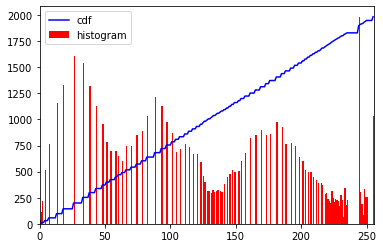

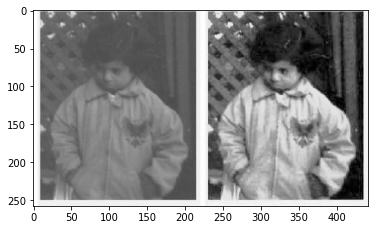

In [24]:
#inbuilt function
equalized_img_inbuilt = cv2.equalizeHist(img)
display_output(img, equalized_img_inbuilt)

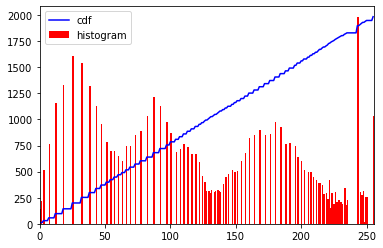

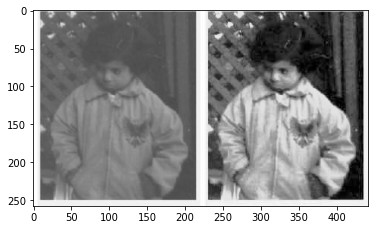

In [25]:
equalized_img_user_defined = equalize_hist(img)
display_output(img, equalized_img_user_defined)

b) Do histogram matching (specification) on the pout-dark image, keeping pout-bright as a reference image.

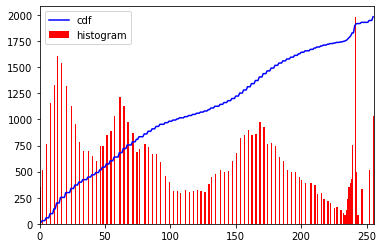

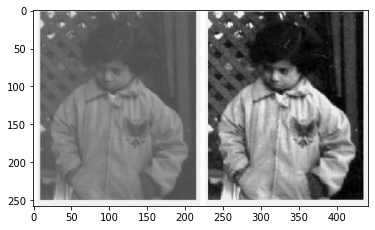

In [26]:
#inbuilt function
matched_img_inbuilt = exposure.match_histograms(img, img_bright, multichannel=False)
display_output(img, matched_img_inbuilt)

In [27]:
# user defined function
def histogram_matching(src_img, ref_img):
    
    #find histograms
    hist, bins = np.histogram(src_img.flatten(),256,[0,256])
    cdf_src = hist.cumsum()

    hist, bins = np.histogram(ref_img.flatten(),256,[0,256])
    cdf_ref = hist.cumsum()

    #normalize values
    cdf_src = cdf_src/(cdf_src.max())*255
    cdf_src = np.around(cdf_src).astype('uint8')

    cdf_ref = cdf_ref/(cdf_ref.max())*255
    cdf_ref = np.around(cdf_ref).astype('uint8')

    b = []
    for i in cdf_src:
        diff = cdf_ref - i
        mask = np.ma.less_equal(diff, -1)
        # We need to mask the negative differences since we are looking for values above i
        if np.all(mask):
            c = np.abs(diff).argmin()
            b.append(c)
        else:
            masked_diff = np.ma.masked_array(diff, mask)
            b.append(masked_diff.argmin())
    
    # here we find the new gray values for each input pixel gray value
    mapped_values = np.array(b,dtype='uint8')
    return mapped_values[src_img]

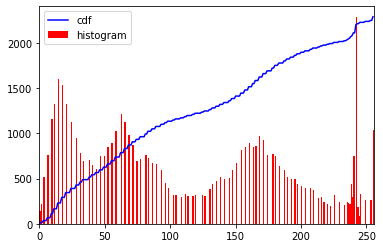

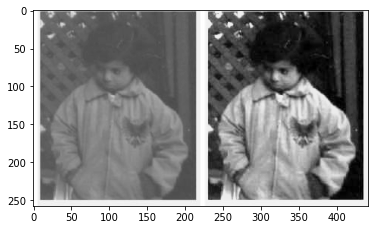

In [28]:
matched_img_user_defined = histogram_matching(img, img_bright)
display_output(img, matched_img_user_defined)